# Hirerachial Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import scipy.cluster.hierarchy as sch


In [2]:
from google.colab import files
upload=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
data=pd.read_excel('EastWestAirlines.xlsx')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
#checking whether data has null values
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
#checking the datatypes of the attributes
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_norm=scaler.fit_transform(data)
df_norm

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

In [7]:
df=pd.DataFrame()
linkages=['single','complete','average','ward']
for i,linkages in enumerate(linkages):
  hc=AgglomerativeClustering(n_clusters=5,linkage=linkages)
  labels=hc.fit_predict(df_norm)
  print(f'labels:{labels},linkages:{linkages}')
  data[f'labels_{linkages}']=labels
data


labels:[0 0 0 ... 1 0 0],linkages:single
labels:[1 1 1 ... 0 1 1],linkages:complete
labels:[2 2 2 ... 0 2 2],linkages:average
labels:[4 4 4 ... 0 2 2],linkages:ward


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels_single,labels_complete,labels_average,labels_ward
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,2,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,2,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,2,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,2,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,0,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,0,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1,2,2


<Axes: >

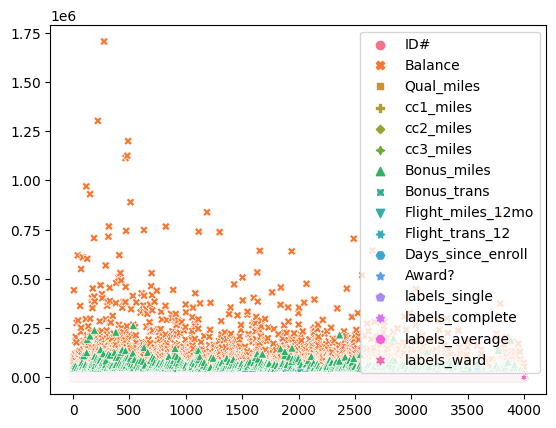

In [18]:
import seaborn as sns
sns.scatterplot(data=data)#



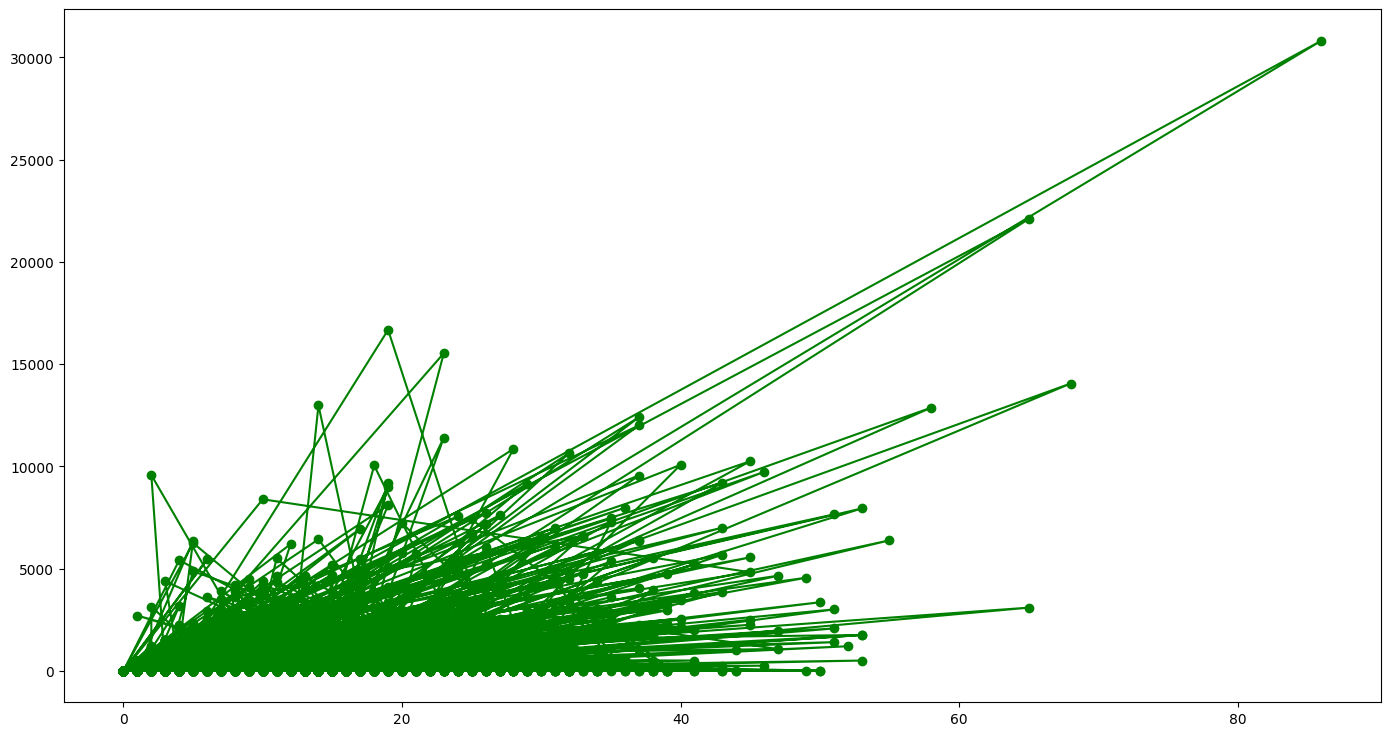

In [42]:
plt.figure(figsize=(17,9))
plt.plot(data['Bonus_trans'],
         data['Flight_miles_12mo'],color='green',marker='o')
#sns.lineplot(data['Flight_miles_12mo'])


**hyperparameter-->Single**

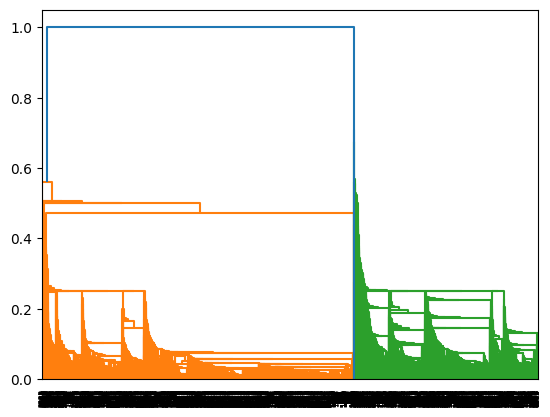

In [9]:
import sys
sys.setrecursionlimit(100000)
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

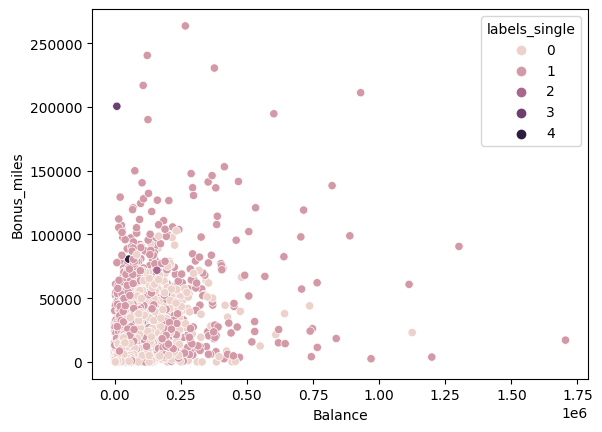

In [20]:
sns.scatterplot(data=data,x="Balance",y="Bonus_miles",hue="labels_single")

Mostly,Balnce and bonus_miles are under 0 and 1 labels and they are higly corelated

<Axes: >

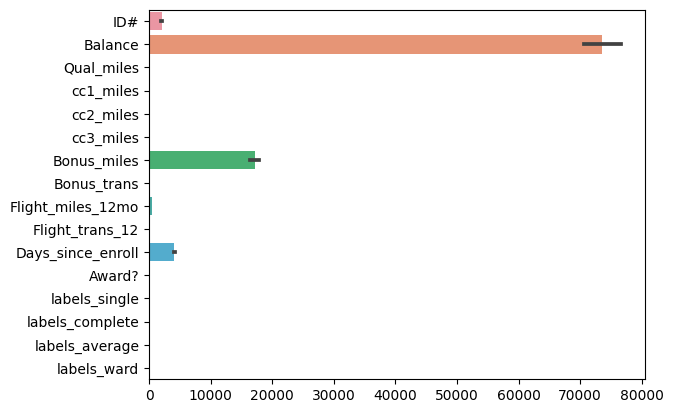

In [22]:
sns.barplot(data=data,orient='h')

In [10]:
data.groupby('labels_single').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels_complete,labels_average,labels_ward
labels_single,,,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.019857,2.000000,2.386021
1,1743.384980,97099.909337,239.744926,2.663058,1.015562,1.018268,28725.065629,15.709066,823.017591,2.536536,4629.606225,1.0,0.829499,0.023004,1.150880
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0,2.000000,3.000000,3.000000
3,2862.000000,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0,0.000000,0.000000,3.000000
4,2032.000000,53232.000000,888.000000,4.000000,1.000000,1.000000,80696.000000,65.000000,22100.000000,45.000000,3831.000000,1.0,2.000000,3.000000,0.000000


**hyperparameters-->Complete**

[[5.0, 5.0, 15.0, 15.0], [45.0, 45.0, 55.0, 55.0], [35.0, 35.0, 50.0, 50.0], [25.0, 25.0, 42.5, 42.5], [10.0, 10.0, 33.75, 33.75], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [65.0, 65.0, 82.5, 82.5], [21.875, 21.875, 73.75, 73.75], [105.0, 105.0, 115.0, 115.0], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [110.0, 110.0, 132.5, 132.5], [155.0, 155.0, 165.0, 165.0], [121.25, 121.25, 160.0, 160.0], [195.0, 195.0, 205.0, 205.0], [185.0, 185.0, 200.0, 200.0], [175.0, 175.0, 192.5, 192.5], [140.625, 140.625, 183.75, 183.75], [225.0, 225.0, 235.0, 235.0], [215.0, 215.0, 230.0, 230.0], [245.0, 245.0, 255.0, 255.0], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [265.0, 265.0, 282.5, 282.5], [250.0, 250.0, 273.75, 273.75], [222.5, 222.5, 261.875, 261.875], [315.0, 315.0, 325.0, 325.0], [305.0, 305.0, 320.0, 320.0], [335.0, 335.0, 345.0, 345.0], [312.5, 312.5, 340.0, 340.0], [242.1875, 242.1875, 326.25, 326.25], [162.1875, 162.1875, 284.21875, 284.21875], [47

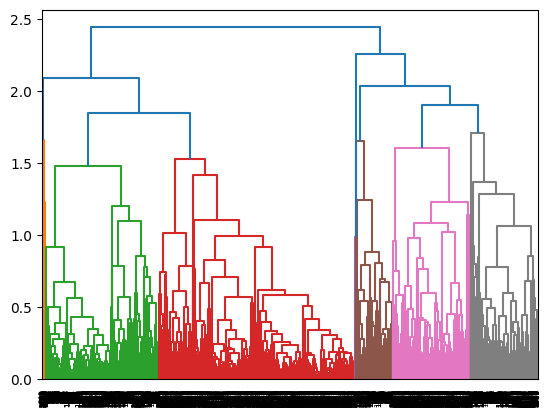

In [11]:
sys.setrecursionlimit(10000)
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))
print(dendrogram['icoord'])

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

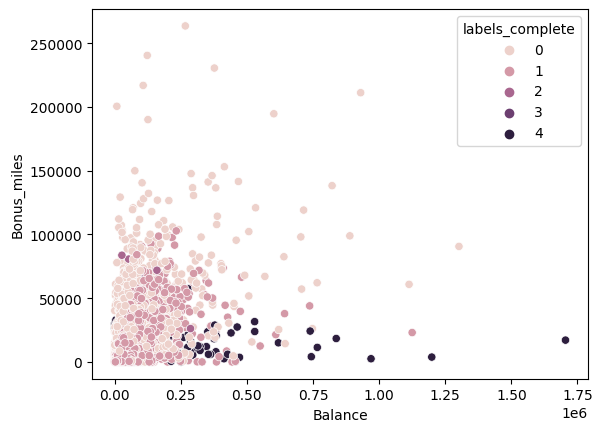

In [24]:
sns.scatterplot(data=data,x="Balance",y="Bonus_miles",hue="labels_complete")

In [12]:
data.groupby('labels_complete').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels_single,labels_average,labels_ward
labels_complete,,,,,,,,,,,,,,,
0,2014.272027,90920.413174,176.971771,2.994867,1.005988,1.021386,33532.760479,16.643285,772.680924,2.332763,4151.118905,1.000000,1.001711,0.023097,0.854577
1,2170.906137,59971.432010,88.480947,1.712395,1.000401,1.008825,10215.097473,9.096270,227.057361,0.653028,3823.422383,0.000000,0.000000,2.000000,2.369836
2,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,2.000000,3.000000,1.500000
3,2113.857143,55387.685714,28.571429,1.028571,2.428571,1.000000,14254.571429,16.342857,398.657143,1.771429,4139.228571,0.285714,0.285714,1.428571,3.714286
4,684.607383,121041.607383,491.486577,1.409396,1.000000,1.006711,10519.322148,11.456376,928.362416,2.949664,6483.204698,1.000000,1.000000,0.003356,2.255034


**hyperparameter-->'average'**

[[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [10.0, 10.0, 30.0, 30.0], [45.0, 45.0, 55.0, 55.0], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [105.0, 105.0, 115.0, 115.0], [82.5, 82.5, 110.0, 110.0], [145.0, 145.0, 155.0, 155.0], [165.0, 165.0, 175.0, 175.0], [150.0, 150.0, 170.0, 170.0], [185.0, 185.0, 195.0, 195.0], [205.0, 205.0, 215.0, 215.0], [235.0, 235.0, 245.0, 245.0], [225.0, 225.0, 240.0, 240.0], [255.0, 255.0, 265.0, 265.0], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [260.0, 260.0, 282.5, 282.5], [315.0, 315.0, 325.0, 325.0], [335.0, 335.0, 345.0, 345.0], [355.0, 355.0, 365.0, 365.0], [395.0, 395.0, 405.0, 405.0], [385.0, 385.0, 400.0, 400.0], [375.0, 375.0, 392.5, 392.5], [360.0, 360.0, 383.75, 383.75], [340.0, 340.0, 371.875, 371.875], [320.0, 320.0, 355.9375, 355.9375], [415.0, 415.0, 425.0, 425.0], [337.96875, 337.96875, 420.0, 420.0], [305.0, 305.0, 378.984375, 378.984375], [271.25, 271.25, 341.9921875, 341.9921875], [455.0, 455.0, 465.0, 4

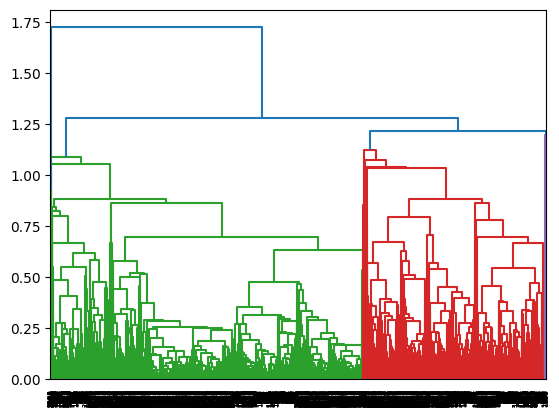

In [13]:
import sys
sys.setrecursionlimit(100000)
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))
print(dendrogram['icoord'])

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

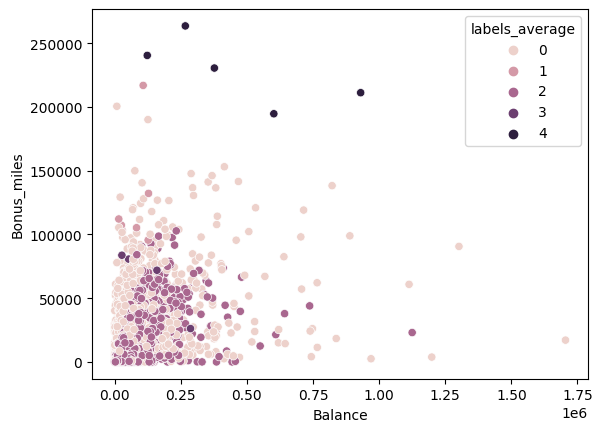

In [27]:
sns.scatterplot(data=data,x="Balance",y="Bonus_miles",hue="labels_average")

In [14]:
data.groupby('labels_average').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels_single,labels_complete,labels_ward
labels_average,,,,,,,,,,,,,,,
0,1749.221995,95829.510929,241.230191,2.647541,1.01571,1.000683,27652.528005,15.504781,799.812842,2.459016,4619.886612,1.0,1.001366,0.831967,1.157787
1,1306.000000,76565.125000,147.750000,3.875000,1.00000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,1.000000,0.500000,0.750000
2,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.000000,1.019857,2.386021
3,3128.000000,131999.500000,347.000000,2.500000,1.00000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,2.000000,2.000000,1.500000
4,280.400000,460129.200000,0.000000,5.000000,1.00000,1.000000,228179.000000,31.200000,2878.600000,7.400000,7275.800000,1.0,1.000000,0.000000,0.000000


**hyperparameters-->'Ward'**

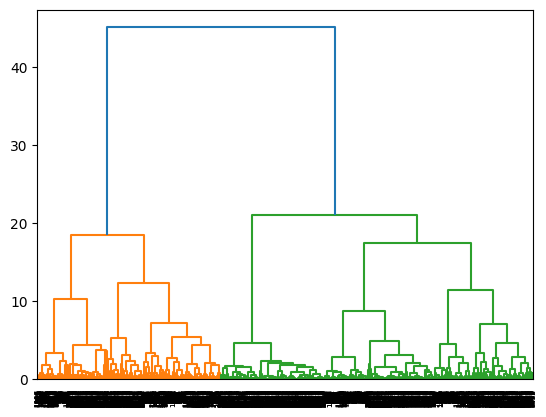

In [15]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='ward'))

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

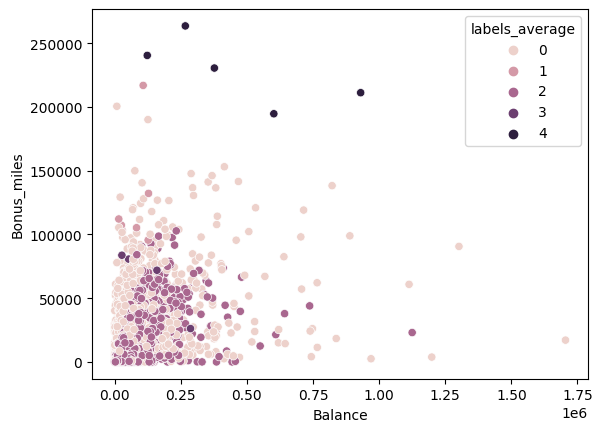

In [28]:
sns.scatterplot(data=data,x="Balance",y="Bonus_miles",hue="labels_average")

In [30]:
data.groupby('labels_ward').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels_single,labels_complete,labels_average
labels_ward,,,,,,,,,,,,,,,
0,1647.451754,103377.721491,221.676535,3.691886,1.001096,1.023026,41796.067982,19.587719,674.711623,2.025219,4796.646930,1.0,1.003289,0.328947,0.035088
1,1879.143216,106682.484925,72.143216,3.227387,1.001256,1.026382,26773.806533,16.486181,196.809045,0.551508,4363.711055,0.0,0.000000,1.000000,2.000000
2,3328.994033,31061.826969,108.257757,1.000000,1.000000,1.000000,2479.093079,5.661098,277.115752,0.769690,1784.566826,0.0,0.000000,1.000000,2.000000
3,1902.894552,86915.794376,269.880492,1.010545,1.038664,1.010545,8244.121265,9.683656,1150.478032,3.520211,4350.043937,1.0,1.005272,1.634446,0.014060
4,1342.245475,44849.627828,81.942308,1.003394,1.038462,1.001131,2674.084842,5.831448,204.661765,0.632353,5261.788462,0.0,0.000000,1.056561,2.000000


# KMeans

In [29]:
upload=files.upload()


Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [43]:
data=pd.read_excel('EastWestAirlines.xlsx')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [49]:
scaler=MinMaxScaler()
df_norm=scaler.fit_transform(data)
df_norm

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

<Axes: >

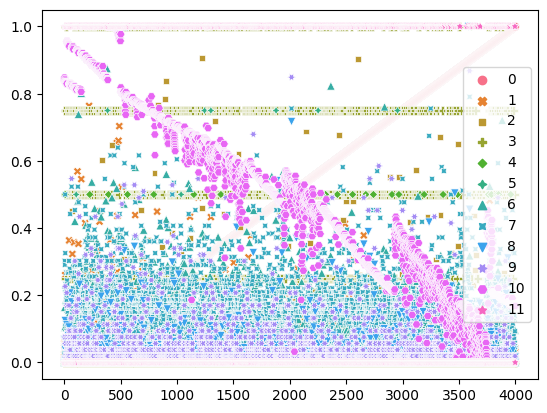

In [48]:
sns.scatterplot(data=df_norm)

In [51]:
kmeans=KMeans(n_clusters=5)
kmeans

KMeans(n_clusters=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

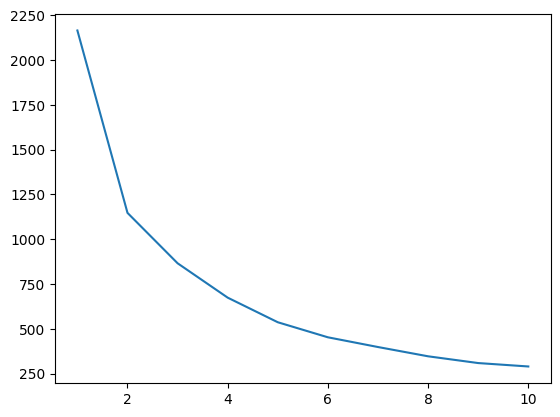

In [53]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=100000)
  kmeans.fit_predict(df_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [55]:
kmeans=KMeans(n_clusters=2,random_state=1000000)

In [57]:
labels=kmeans.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
data['labels']=labels

In [60]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [61]:
data.groupby('labels').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
labels,,,,,,,,,,,,
0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


<Axes: >

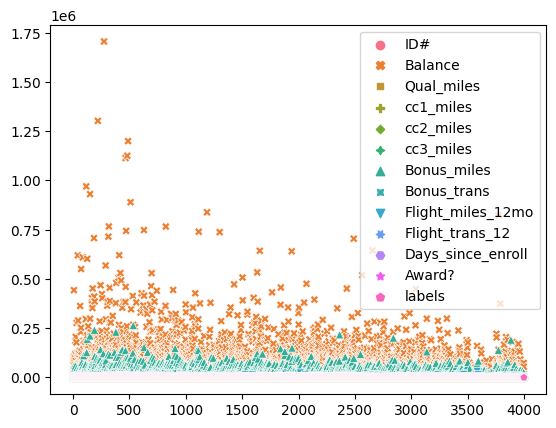

In [63]:
sns.scatterplot(data=data)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

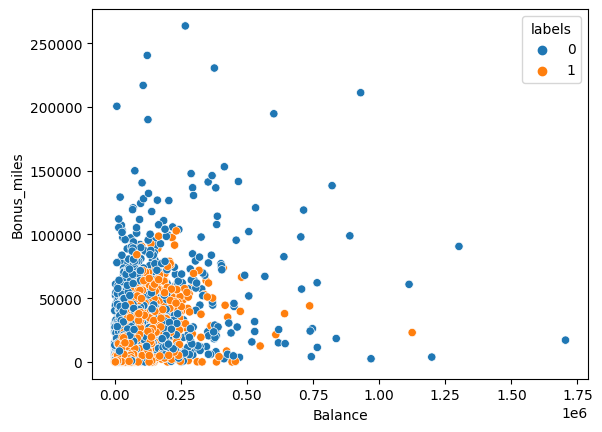

In [68]:
sns.scatterplot(data=data,x="Balance",y="Bonus_miles",hue="labels")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.1% of the points cannot be plac

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

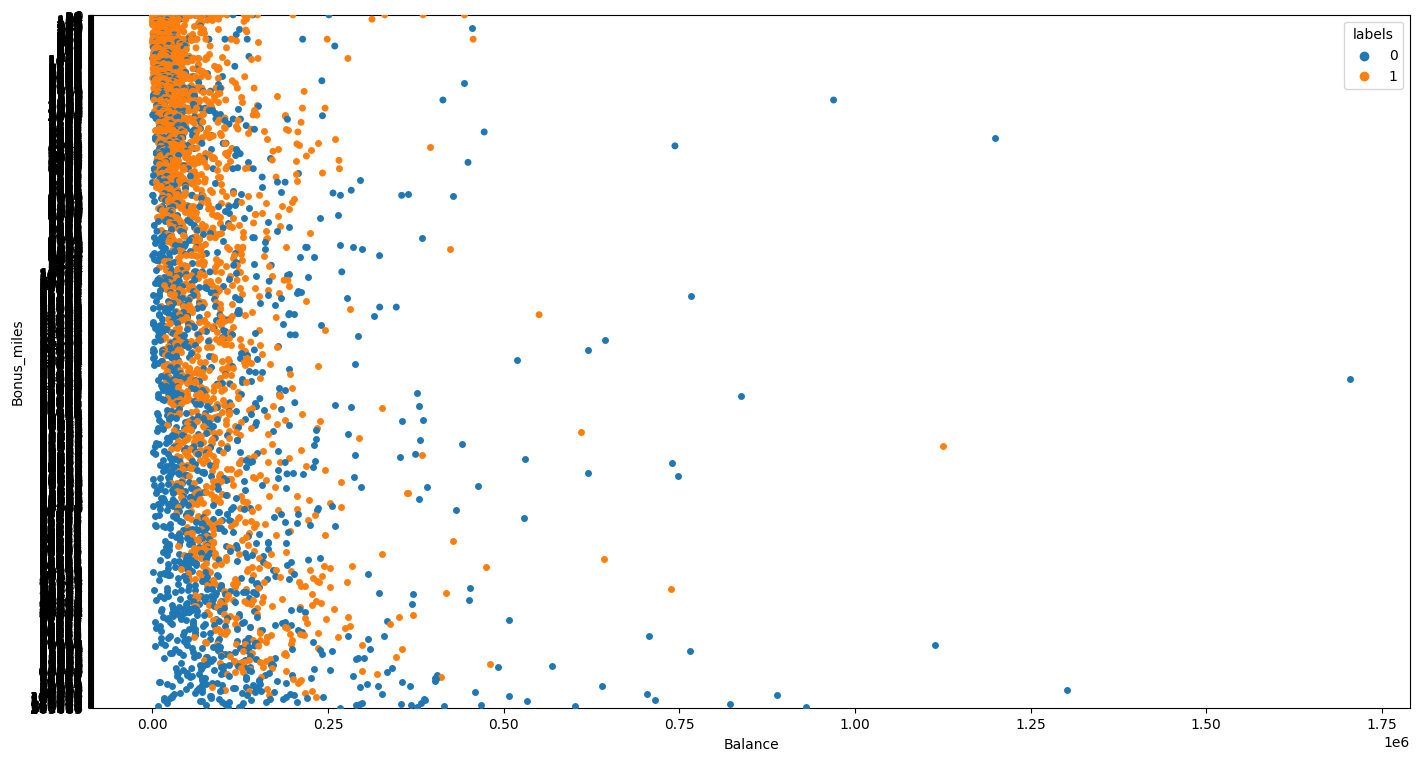

In [71]:
plt.figure(figsize=(17,9))
sns.swarmplot(data=data,x="Balance",y="Bonus_miles",hue="labels",orient='h')

# DBSCAN

In [72]:
upload=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (2).xlsx


In [73]:
data=pd.read_excel('EastWestAirlines.xlsx')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [74]:
scaler=MinMaxScaler()
df_norm=scaler.fit_transform(data)

In [77]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan

DBSCAN(eps=2)

In [78]:
labes=dbscan.fit_predict(df_norm)

In [79]:
data['labels']=labels

In [80]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [81]:
data.groupby('labels').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
labels,,,,,,,,,,,,
0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


<Axes: >

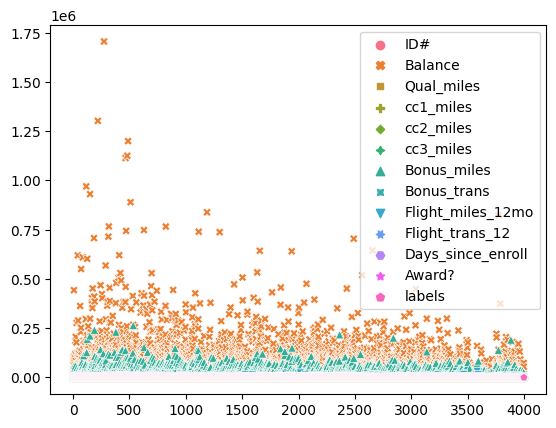

In [84]:
sns.scatterplot(data=data)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

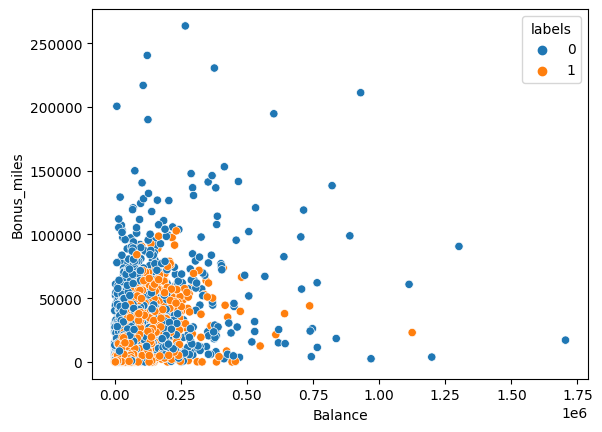

In [86]:
sns.scatterplot(data=data,x="Balance",y="Bonus_miles",hue="labels")

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

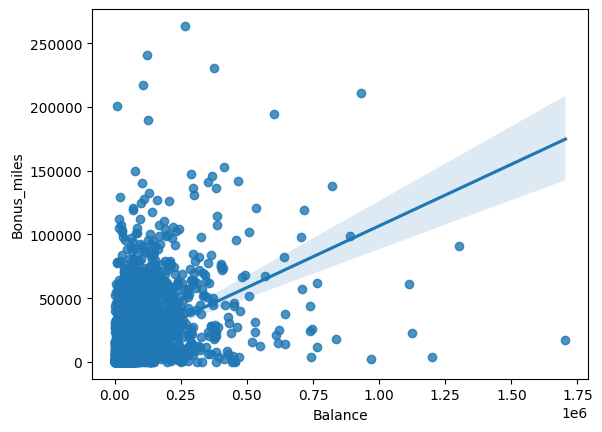

In [88]:
sns.regplot(data=data,x="Balance",y="Bonus_miles")